In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import seaborn as sns
 
 #Preprocessing, normalizing
from sklearn.preprocessing import StandardScaler

#for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
    
    #models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
    
    ##Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
    
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 5)

In [5]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [6]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [7]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [8]:
df ['sales'] = df ['sales']. fillna(df['sales'].mode ()[0])

df ['TV'] = df ['TV'] .fillna (df ['TV'].mean())

df ['newspaper'] = df ['newspaper'].fillna (df ['newspaper'].mean())

In [9]:
df = df.drop (columns= ['Unnamed: 0'])
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


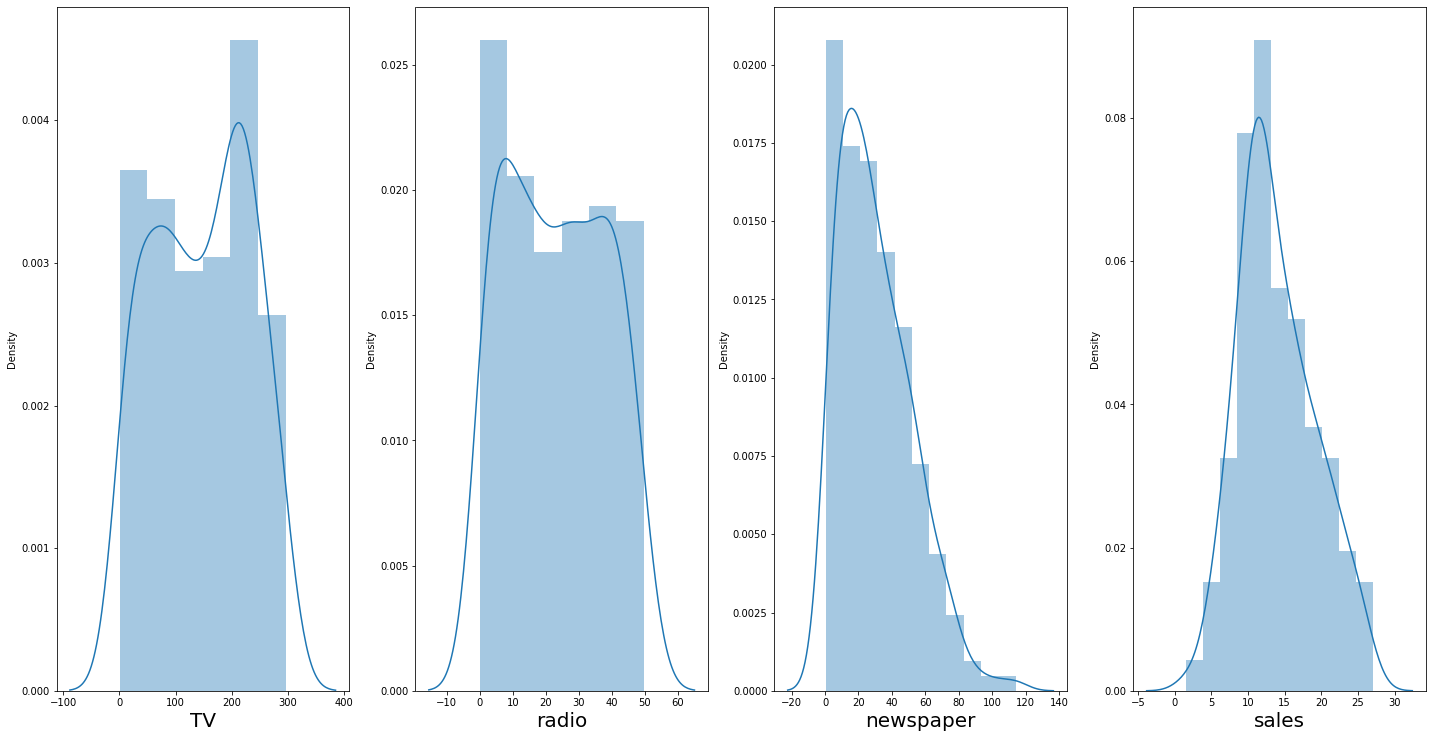

In [11]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=8:
        ax = plt.subplot (2,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.tight_layout()

In [12]:
y = df ['sales']
x = df. drop (columns=['sales'])

In [13]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [14]:
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


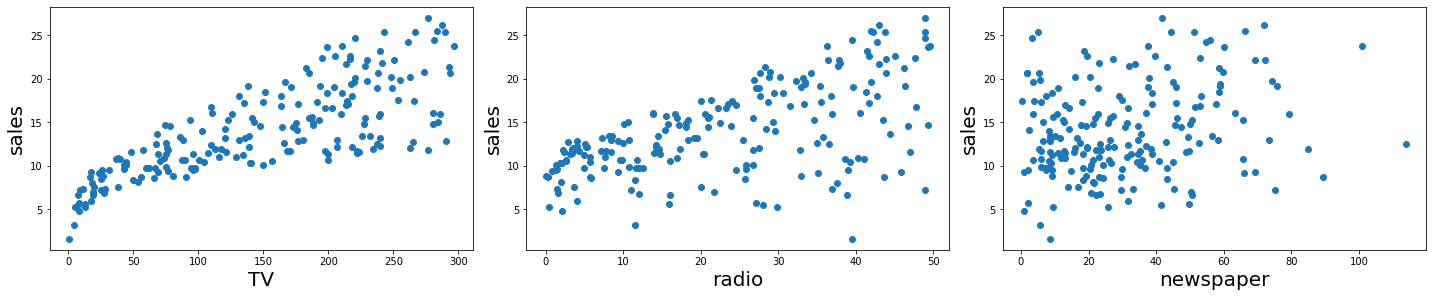

In [15]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=15:
        ax = plt.subplot (5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('sales',fontsize=20)
    
    plotnumber+=1
plt.tight_layout()

In [16]:
scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)

In [17]:
x_scaled

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

In [18]:
x_train,x_test, y_train,y_test =  train_test_split(x_scaled,y,test_size=0.25, random_state=560068)
y_train.head()

45     14.9
55     23.7
121     7.0
176    20.2
183    26.2
Name: sales, dtype: float64

In [19]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [20]:
df['TV'].value_counts()

76.4     2
17.2     2
240.1    2
197.6    2
184.9    2
        ..
117.2    1
289.7    1
137.9    1
220.5    1
13.1     1
Name: TV, Length: 190, dtype: int64

In [21]:
sns.set()

In [22]:
df['newspaper'].value_counts()

25.6    3
9.3     3
8.7     3
7.4     2
22.9    2
       ..
2.4     1
13.8    1
1.8     1
57.6    1
19.4    1
Name: newspaper, Length: 172, dtype: int64

In [23]:
model = LinearRegression()

In [24]:
model.fit(x_train,y_train)

LinearRegression()

In [25]:
x_train_prediction = model.predict(x_train)

In [26]:
model.score(x_train,y_train)

0.8930051205846575

In [27]:
model.score(x_test,y_test)

0.9087885653882132

In [28]:
y_pred=model.predict(x_test)

In [29]:
y_pred

array([ 7.48583156, 12.47619683, 15.56778694, 17.345569  , 17.13188234,
       11.02623458, 18.89657634, 15.56463292, 16.33360587, 17.35527594,
       13.87186747, 11.70580844, 19.99374841, 11.15953953, 15.27472522,
       17.03855141, 13.36049593, 20.87946922,  7.75258389, 16.19013613,
        6.61272827, 13.94560963,  9.89343775, 24.10452859, 14.34818088,
       23.08799024,  8.66187653, 12.50958507, 10.55104458, 16.44882838,
       20.39301384, 19.27393594, 13.10515132, 15.47552312, 21.20029728,
       23.19519445, 11.93029755, 10.72386359, 11.37436062, 12.43245786,
       16.94471212, 12.12662433,  9.20454263, 20.8562715 ,  5.7875785 ,
       15.10247437,  6.59352217,  3.84719523,  6.93741149, 12.42885934])

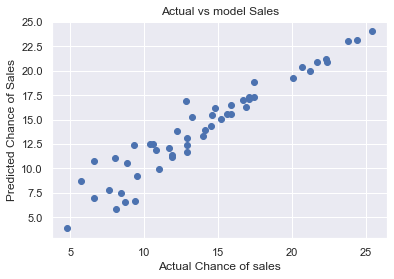

In [31]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Chance of sales')
plt.ylabel('Predicted Chance of Sales')
plt.title('Actual vs model Sales')
plt.show()